In [1]:
%pip install bs4 requests 'polars[all]' lxml pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import polars as pl
from polars import Config
import re
import json5
import pandas as pd
import os
from pathlib import Path
from PIL import Image

In [3]:
Config.set_tbl_rows(100)

polars.config.Config

In [4]:
url = 'https://distrowatch.com/index.php?dataspan=1'
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')
distros = soup.find_all('td', {'class': 'phr2'})
hits = soup.find_all('td', {'class': 'phr3'})

In [6]:
distributions = []
ids = []
page_hits = []
for distro in distros:
    distributions.append(distro.get_text())
    ids.append(distro.a['href'])

for hit in hits:
    page_hits.append(int(hit.get_text()))

In [7]:
top_distros = {
    'distribution': distributions,
    'id': ids,
    'page hit(s)': page_hits 
}
df = pd.DataFrame(top_distros)
df.to_json("top_distros.json", orient="records")

In [8]:
df = pl.read_json("top_distros.json")
df

distribution,id,page hit(s)
str,str,i64
"""MX Linux""","""mx""",2753
"""Mint""","""mint""",1943
"""EndeavourOS""","""endeavour""",1639
"""Debian""","""debian""",1408
"""Fedora""","""fedora""",1307
"""Manjaro""","""manjaro""",1082
"""Ubuntu""","""ubuntu""",1064
"""Pop!_OS""","""popos""",885
"""BackBox""","""backbox""",817


In [9]:
def add_hyphen(string):
    pattern = r'(\d)([a-zA-Z])'
    result = re.sub(pattern, r'\1-\2', string)
    return result

In [10]:
def scrape_features_as_json(id):
    link = f'https://distrowatch.com/table.php?distribution={id}'
    scrape = requests.get(link)
    dist_soup = BeautifulSoup(scrape.content, 'lxml')
    counter = 0

    features = [""]
    while features[0] != "Feature":
        features = dist_soup.select('tr')[counter]
        for br in features.find_all('br'):
            br.replace_with('-')
        features = features.get_text()
        features = features.strip().split("\n")
        if features[0] != "Feature":
            counter += 1
    for idx, feature in enumerate(features):
        feature_new = add_hyphen(feature)
        features[idx] = feature_new
    if features[0] == features[-1]:
        features.pop()

    release = dist_soup.select('tr')[counter + 1].get_text()
    release = release.split("\n")
    release.pop(0)
    release.pop(-1)
    if release[0] == release[-1]:
        release.pop()

    end_of_life = dist_soup.select('tr')[counter + 2].get_text()
    end_of_life = end_of_life.replace('\xa0', '\xa0\n')  # Assume we need to insert '\n' after every '\xa0'
    end_of_life = end_of_life.replace('\xa0\n\n', '\xa0\n')
    end_of_life = end_of_life.replace(';', '')
    end_of_life = end_of_life.split("\n")
    end_of_life.pop(0)
    end_of_life.pop(-1)
    for idx, eol in enumerate(end_of_life):
        if eol == "\xa0":
            end_of_life[idx] = "NA"
    if end_of_life[0] == end_of_life[-1]:
        end_of_life.pop()

    price = dist_soup.select('tr')[counter + 3].get_text()
    price = price.split("\n")
    price.pop(0)
    price.pop(-1)
    for idx, p in enumerate(price):
        if p == "\xa0":
            price[idx] = "NA"
    if price[0] == price[-1]:
        price.pop()

    image_size = dist_soup.select('tr')[counter + 4].get_text()
    image_size = image_size.split("\n")
    image_size.pop(0)
    image_size.pop(-1)
    for idx, im in enumerate(image_size):
        if im == "\xa0":
            image_size[idx] = "NA"
    if image_size[0] == image_size[-1]:
        image_size.pop()

    free_download = dist_soup.select('tr')[counter + 5]
    free_download_list = []
    free_download_list.append(free_download.th.get_text())
    for idx, iso in enumerate(free_download.find_all("td")):
        if iso.a:
            free_download_list.append(iso.find('a')["href"])
        else:
            free_download_list.append("NA")
    
    installation = dist_soup.select('tr')[counter + 6].get_text()
    installation = installation.split("\n")
    installation.pop(0)
    installation.pop(-1)
    for idx, ins in enumerate(installation):
        if ins == "\xa0":
            installation[idx] = "NA"
    if installation[0] == installation[-1]:
        installation.pop()

    default_desktop = dist_soup.select('tr')[counter + 7].get_text()
    default_desktop = default_desktop.split("\n")
    default_desktop.pop(0)
    default_desktop.pop(-1)
    for idx, dd in enumerate(default_desktop):
        if dd == "\xa0":
            default_desktop[idx] = "NA"
    if default_desktop[0] == default_desktop[-1]:
        default_desktop.pop()

    package_management = dist_soup.select('tr')[counter + 8].get_text()
    package_management = package_management.split("\n")
    package_management.pop(0)
    package_management.pop(-1)
    for idx, pm in enumerate(package_management):
        if pm == "\xa0":
            package_management[idx] = "NA"
    if package_management[0] == package_management[-1]:
        package_management.pop()

    release_model = dist_soup.select('tr')[counter + 9].get_text()
    release_model = release_model.split("\n")
    release_model.pop(0)
    release_model.pop(-1)
    for idx, rm in enumerate(release_model):
        if rm == "\xa0":
            release_model[idx] = "NA"
    if release_model[0] == release_model[-1]:
        release_model.pop()

    office_suite = dist_soup.select('tr')[counter + 10].get_text()
    office_suite = office_suite.split("\n")
    office_suite.pop(0)
    office_suite.pop(-1)
    for idx, o in enumerate(office_suite):
        if o == "\xa0":
            office_suite[idx] = "NA"
    if office_suite[0] == office_suite[-1]:
        office_suite.pop()

    arch = dist_soup.select('tr')[counter + 11].get_text()
    arch = arch.split("\n")
    arch.pop(0)
    arch.pop(-1)
    for idx, a in enumerate(arch):
        if a == "\xa0":
            arch[idx] = "NA"
    if arch[0] == arch[-1]:
        arch.pop()

    init = dist_soup.select('tr')[counter + 12].get_text()
    init = init.split("\n")
    init.pop(0)
    init.pop(-1)
    for idx, i in enumerate(init):
        if i == "\xa0":
            init[idx] = "NA"
    if init[0] == init[-1]:
        init.pop()

    fs = dist_soup.select('tr')[counter + 13].get_text()
    fs = fs.split("\n")
    fs.pop(0)
    fs.pop(-1)
    for idx, f in enumerate(fs):
        if f == "\xa0":
            fs[idx] = "NA"
    if fs[0] == fs[-1]:
        fs.pop()

    lang = dist_soup.select('tr')[counter + 14].get_text()
    lang = lang.split("\n")
    lang.pop(0)
    lang.pop(-1)
    for idx, l in enumerate(lang):
        if l == "\xa0":
            lang[idx] = "NA"
    if lang[0] == lang[-1]:
        lang.pop()

    asian = dist_soup.select('tr')[counter + 15].get_text()
    asian = asian.split("\n")
    asian.pop(0)
    asian.pop(-1)
    for idx, a in enumerate(asian):
        if a == "\xa0":
            asian[idx] = "NA"
    if asian[0] == asian[-1]:
        asian.pop()

    version = dist_soup.select('tr')[counter + 16].get_text()
    version = version.split("\n")
    version.pop(0)
    version.pop(-1)
    for idx, v in enumerate(version):
        if a == "\xa0":
            version[idx] = "NA"
    if version[0] == version[-1]:
        version.pop()

    num_packages = dist_soup.select('tr')[counter + 16]
    num_packages_list = []
    suffixes = []
    for idx, link in enumerate(num_packages.find_all("td")):
        if link.a:
            num_packages_list.append(link.find('a')["href"])
        else:
            num_packages_list.append("NA")
    ctr = 0
    for idx, elem in enumerate(num_packages_list):
        if elem == "NA":
            num_packages_list[idx] = "NA"
        else:
            pkg_link = f'https://distrowatch.com/{elem}'
            pkg_scrape = requests.get(pkg_link)
            pkg_soup = BeautifulSoup(pkg_scrape.content, "lxml")
            while not pkg_soup.select("b")[ctr].get_text().startswith("Number of packages:"):
                ctr += 1
            num_packages_list[idx] = pkg_soup.select("b")[ctr].get_text().strip()[20:].replace(",", "")
    num_packages_list.insert(0, "Number of Packages")

    npkgs = dist_soup.select('tr')[counter + 16]
    npkgs_list = []
    suffixes = []
    dist_version = []
    for idx, link in enumerate(npkgs.find_all("td")):
        if link.a:
            npkgs_list.append(npkgs.find_all('a')[idx]["href"])
            dist_version.append(npkgs.select("a")[idx].get_text())
        else:
            npkgs_list.append("NA")
    
    ctr = -1
    pkg_list = [] 
    for idx, elem in enumerate(npkgs_list):
        if elem == "NA":
            pkg_list.append("NA")
        else:
            pkg_link = f'https://distrowatch.com/{elem}'
            pkg_scrape = requests.get(pkg_link)
            pkg_soup = BeautifulSoup(pkg_scrape.content, "lxml")
            while str(pkg_soup.select("a")[ctr].get("href")).endswith(".txt") == False:
                ctr -= 1
            pkg_list.append(pkg_soup.select("a")[ctr]["href"])
    
    if os.path.exists(f"{id}"):
        os.chdir(f"{id}")
    else:
        os.mkdir(f"{id}")
        os.chdir(f"{id}")
    print(" Scraping packages...")    
    dist_ctr = 0
    for new_link in pkg_list:
        if new_link == "NA":
            continue
        new_link = "https://distrowatch.com/" + new_link
        link_scrape = requests.get(new_link)
        link_soup = BeautifulSoup(link_scrape.content, 'lxml')
        packages = link_soup.find('p').get_text().strip().split("\n")
        
        sp = []
        for items in packages:
            if "^" in items:
                sp.append(items.split("^"))
            else:
                sp.append([items, "-"])
        
        pkg_name = []
        ver = []
        for item in sp:
            for idx, elem in enumerate(item):
                if idx == 0:
                    pkg_name.append(elem)
                if idx == 1:
                    ver.append(elem)

        pkg_result_json = {
            "distribution_name": [id] * len(pkg_name),
            "version": [dist_version[dist_ctr]] * len(pkg_name),
            "package_name": pkg_name,
            "package_version": ver
        }
        print(f"len of package name: {len(pkg_name)} \nlen of package version: {len(ver)}")
        pkg_df = pd.DataFrame(pkg_result_json)
        pkg_df.to_json(f'{id}_{dist_version[dist_ctr]}_pkglist.json', orient="records")
        print(f"        {dist_ctr + 1}. Scraped: {id}_{dist_version[dist_ctr]}_pkglist.json")
        dist_ctr += 1
    print(" Done. Exiting...")
    os.chdir("..")

    result = {
        release[0]: release[1:],
        end_of_life[0]: end_of_life[1:],
        price[0]: price[1:],
        image_size[0]: image_size[1:],
        free_download_list[0]: free_download_list[1:],
        installation[0]: installation[1:],
        default_desktop[0]: default_desktop[1:],
        package_management[0]: package_management[1:],
        release_model[0]: release_model[1:],
        office_suite[0]: office_suite[1:],
        arch[0]: arch[1:],
        init[0]: init[1:],
        fs[0]: fs[1:],
        lang[0]: lang[1:],
        asian[0]: asian[1:],
        num_packages_list[0]: num_packages_list[1:], 
    }

    result_json = {
        "distribution_name": [id] * len(features[1:]),
        "version": features[1:],
        "release_date": release[1:],
        "end_of_life": end_of_life[1:],
        "price": price[1:],
        "image_size": image_size[1:],
        "download_link": free_download_list[1:],
        "installation_method": installation[1:],
        "default_desktop": default_desktop[1:],
        "package_management": package_management[1:],
        "release_model": release_model[1:],
        "office_suite": office_suite[1:],
        "processor_architecture": arch[1:],
        "init_system": init[1:],
        "file_system": fs[1:],
        "multilingual": lang[1:],
        "asian_language_support": asian[1:],
        "number_of_packages": num_packages_list[1:],
    }
    
    df = pd.DataFrame(result_json)
    #df.transpose(include_header=True, header_name=features[0], column_names=features[1:]).write_json(f'features_{id}.json')
    df.to_json(f'features_{id}.json', orient="records")

In [11]:
os.getcwd()

'/home/sachin/Documents/Projects/DSAI/Distro_rec'

In [12]:
for idx, id in enumerate(ids):
    print(f"{idx+1}. scraping: {id}")
    scrape_features_as_json(id)
    print(f"{idx+1}. scraped: {id}")

1. scraping: mx
 Scraping packages...
len of package name: 2741 
len of package version: 2741
        1. Scraped: mx_23.1_pkglist.json
len of package name: 2681 
len of package version: 2681
        2. Scraped: mx_21.3_pkglist.json
len of package name: 2742 
len of package version: 2742
        3. Scraped: mx_19.4_pkglist.json
len of package name: 1931 
len of package version: 1931
        4. Scraped: mx_18.3_pkglist.json
len of package name: 1850 
len of package version: 1850
        5. Scraped: mx_17.1_pkglist.json
len of package name: 1783 
len of package version: 1783
        6. Scraped: mx_16.1_pkglist.json
 Done. Exiting...
1. scraped: mx
2. scraping: mint
 Scraping packages...
len of package name: 2117 
len of package version: 2117
        1. Scraped: mint_6-lmde_pkglist.json
len of package name: 2275 
len of package version: 2275
        2. Scraped: mint_21.2_pkglist.json
len of package name: 2005 
len of package version: 2005
        3. Scraped: mint_5-lmde_pkglist.json
len of

IndexError: list index out of range

In [ ]:
def scrape_images(ids):
    link = f'https://distrowatch.com/table.php?distribution={id}'
    scrape = requests.get(link)
    dist_soup = BeautifulSoup(scrape.content, 'lxml')
    src = dist_soup.find(class_ = 'TablesTitle').find('img')['src']
    src = src.replace(' ', '%20')
    img_src = 'https://www.distrowatch.com/' + src
    img = Image.open(requests.get(img_src,stream=True).raw)
    img = img.convert('RGB')
    img.save(f'{id}.png')

In [ ]:
def scrape_artwork(ids):
    link = f'https://distrowatch.com/table.php?distribution={id}'
    scrape = requests.get(link)
    dist_soup = BeautifulSoup(scrape.content, 'lxml')
    src = dist_soup.select('img')[-5]['src']
    src = src.replace(' ', '%20')
    img_src = 'https://www.distrowatch.com/' + src
    img = Image.open(requests.get(img_src,stream=True).raw)
    img = img.convert('RGB')
    img.save(f'{id}.png')

In [17]:
for id in ids:
    file_path = Path()
    if os.path.exists(f"features_{id}.json"):
       print(f"scraped: {id}")
       continue
    scrape_features_as_json(id)
    print(f"scraped: {id}")

scraped: mx
scraped: mint
scraped: endeavour
scraped: debian
scraped: fedora
scraped: manjaro
scraped: ubuntu
scraped: popos
scraped: backbox
scraped: alma
scraped: opensuse
scraped: zorin
scraped: garuda
scraped: kdeneon
scraped: freebsd
scraped: nobara
scraped: antix
scraped: relianoid
scraped: elementary
scraped: lite
scraped: nixos
scraped: vanilla
scraped: easyos
scraped: redhat
scraped: mageia
scraped: kaos
scraped: kali
scraped: makulu
scraped: pclinuxos
scraped: puppy
scraped: tuxedo
scraped: devuan
scraped: mabox
scraped: netbsd
scraped: eurolinux
scraped: q4os
scraped: reactos
scraped: peppermint
scraped: solus
scraped: sparky
scraped: arco
scraped: slackware
scraped: alpine
scraped: cachyos
scraped: biglinux
scraped: blendos
scraped: kubuntu
scraped: bodhi
scraped: ghostbsd
scraped: ubports
scraped: pureos
scraped: centos
scraped: rocky
scraped: tails
scraped: clonezilla
scraped: lubuntu
scraped: parrot
scraped: xubuntu
scraped: voyager
scraped: gentoo
scraped: artix
scraped

In [ ]:
os.chdir("logos")
print(f"Will save in: {os.getcwd()}")
for id in ids:
    if os.path.exists(f"{id}.png"):
       print(f"saved: {id}.png")
       continue
    scrape_images(id)
    print(f"saved: {id}.png")
print("Done. Exiting...")
os.chdir("..")

Will save in: /home/sachin/Documents/Projects/DSAI/Distro_rec/logos
saved: mx.png
saved: mint.png
saved: endeavour.png
saved: debian.png
saved: fedora.png
saved: manjaro.png
saved: ubuntu.png
saved: popos.png
saved: backbox.png
saved: alma.png
saved: opensuse.png
saved: zorin.png
saved: garuda.png
saved: kdeneon.png
saved: freebsd.png
saved: nobara.png
saved: antix.png
saved: relianoid.png
saved: elementary.png
saved: lite.png
saved: nixos.png
saved: vanilla.png
saved: easyos.png
saved: redhat.png
saved: mageia.png
saved: kaos.png
saved: kali.png
saved: makulu.png
saved: pclinuxos.png
saved: puppy.png
saved: tuxedo.png
saved: devuan.png
saved: mabox.png
saved: netbsd.png
saved: eurolinux.png
saved: q4os.png
saved: reactos.png
saved: peppermint.png
saved: solus.png
saved: sparky.png
saved: arco.png
saved: slackware.png
saved: alpine.png
saved: cachyos.png
saved: biglinux.png
saved: blendos.png
saved: kubuntu.png
saved: bodhi.png
saved: ghostbsd.png
saved: ubports.png
saved: pureos.png
s

In [12]:
os.chdir("desktop_preview")
print(f"Will save in: {os.getcwd()}")
for id in ids:
    if os.path.exists(f"{id}.png"):
       print(f"saved: {id}.png")
       continue
    scrape_artwork(id)
    print(f"saved: {id}.png")
print("Done. Exiting...")
os.chdir("..")

FileNotFoundError: [Errno 2] No such file or directory: 'desktop_preview'

In [ ]:
def scrape_packages(id):
    

In [31]:
data = pl.read_json("features_devuan.json")

In [32]:
data

distribution_name,version,release_date,end_of_life,price,image_size,download_link,installation_method,default_desktop,package_management,release_model,office_suite,processor_architecture,init_system,file_system,multilingual,asian_language_support,number_of_packages
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""devuan""","""unstable-ceres…","""2023-11-09""","""NA""","""Free""","""NA""","""https://packag…","""Graphical""","""Cinnamon, LXQt…","""DEB""","""Rolling""","""GOffice, Libre…","""i586, x86_64""","""OpenRC, runit,…","""Btrfs, ext3, e…","""Yes""","""Yes""","""36798"""
"""devuan""","""testing-testin…","""2023-11-09""","""NA""","""Free""","""NA""","""https://packag…","""Graphical""","""Xfce""","""DEB""","""Semi-Rolling""","""GOffice, Libre…","""i586, x86_64""","""OpenRC, runit,…","""Btrfs, ext3, e…","""Yes""","""Yes""","""35370"""
"""devuan""","""5.0.0-daedalus…","""2023-08-15""","""NA""","""Free""","""400-3900""","""https://files.…","""Graphical""","""Xfce""","""DEB""","""Fixed""","""LibreOffice""","""i586, x86_64""","""OpenRC, runit,…","""Btrfs, ext3, e…","""Yes""","""Yes""","""4772"""
"""devuan""","""4.0.0-chimaera…","""2021-10-14""","""NA""","""Free""","""300-3700""","""https://files.…","""Graphical""","""Xfce""","""DEB""","""Fixed""","""LibreOffice""","""arm64, armel, …","""OpenRC, runit,…","""Btrfs, ext3, e…","""Yes""","""Yes""","""4888"""
"""devuan""","""3.1.0-beowulf""","""2021-02-15""","""NA""","""Free""","""300-3700""","""https://files.…","""Graphical""","""Xfce""","""DEB""","""Fixed""","""LibreOffice""","""arm64, armel, …","""OpenRC, runit,…","""Btrfs, ext3, e…","""Yes""","""Yes""","""5087"""
"""devuan""","""2.1-ascii""","""2019-11-25""","""NA""","""Free""","""200-4500""","""https://files.…","""Graphical""","""Xfce""","""DEB""","""Fixed""","""LibreOffice""","""armhf, i386, x…","""SysV""","""ext3, ext4""","""Yes""","""Yes""","""5160"""
"""devuan""","""1.0.0-jessie""","""2017-05-25""","""2020-06""","""Free""","""NA""","""https://files.…","""Graphical""","""Xfce""","""DEB""","""Fixed""","""GOffice, Libre…","""armhf, i386, x…","""SysV""","""Btrfs, ext3, e…","""Yes""","""Yes""","""4951"""


In [20]:
ids

['mx',
 'mint',
 'endeavour',
 'debian',
 'fedora',
 'manjaro',
 'ubuntu',
 'popos',
 'backbox',
 'alma',
 'opensuse',
 'zorin',
 'garuda',
 'kdeneon',
 'freebsd',
 'nobara',
 'antix',
 'relianoid',
 'elementary',
 'lite',
 'nixos',
 'vanilla',
 'easyos',
 'redhat',
 'mageia',
 'kaos',
 'kali',
 'makulu',
 'pclinuxos',
 'puppy',
 'tuxedo',
 'devuan',
 'mabox',
 'netbsd',
 'eurolinux',
 'q4os',
 'reactos',
 'peppermint',
 'solus',
 'sparky',
 'arco',
 'slackware',
 'alpine',
 'cachyos',
 'biglinux',
 'blendos',
 'kubuntu',
 'bodhi',
 'ghostbsd',
 'ubports',
 'pureos',
 'centos',
 'rocky',
 'tails',
 'clonezilla',
 'lubuntu',
 'parrot',
 'xubuntu',
 'voyager',
 'gentoo',
 'artix',
 'arch',
 'spiral',
 'smartos',
 'lernstick',
 'athena',
 'xero',
 'alt',
 'wattos',
 'gecko',
 'openbsd',
 'linuxfx',
 'archcraft',
 'haiku',
 'rebornos',
 'rhino',
 'gnoppix',
 'kodachi',
 'lxle',
 'regata',
 'tinycore',
 'openmandriva',
 'bluestar',
 'oracle',
 'nitrux',
 'ubuntumate',
 'slax',
 'clear',
 'n

In [4]:
data = pd.read_csv("Homepage.csv")

In [5]:
data

,Unnamed: 0.1,Unnamed: 0,Name,ID,Description,Homepage,Popularities,Ratings,Os Types,Bases,Origins,Architectures,Desktops,Categories,Statuses
0,0,0,MX Linux,mx,"MX Linux, a desktop-oriented Linux distributio...",['https://mxlinux.org/'],"['1 (2,650 hits per day)']",['8.15'],['Linux'],"['Debian (Stable)', 'antiX']","['Greece, USA']","['armhf', 'i686', 'x86_64']","['Fluxbox', 'KDE Plasma', 'Xfce']","['Desktop', 'From RAM', 'Live Medium', 'Raspbe...",['Active']
1,1,1,Linux Mint,mint,Linux Mint is an Ubuntu-based distribution who...,['https://linuxmint.com/'],"['2 (2,125 hits per day)']",['8.71'],['Linux'],"['Debian (Stable)', 'Ubuntu (LTS)']",['Ireland'],"['i686', 'x86_64']","['Cinnamon', 'MATE', 'Xfce']","['Beginners', 'Desktop', 'Live Medium']",['Active']
2,2,2,EndeavourOS,endeavour,EndeavourOS is a rolling release Linux distrib...,['https://endeavouros.com/'],"['3 (1,715 hits per day)']",['8.45'],['Linux'],['Arch'],['Netherlands'],"['aarch64', 'x86_64']","['Budgie', 'Cinnamon', 'GNOME', 'i3', 'KDE Pla...","['Desktop', 'Live Medium']",['Active']
3,3,3,Debian,debian,The Debian Project is an association of indivi...,['https://www.debian.org/'],"['4 (1,559 hits per day)']",['8.85'],['Linux'],[],['Global'],"['aarch64', 'armel', 'armhf', 'i386', 'i686', ...","['AfterStep', 'Awesome', 'Blackbox', 'Cinnamon...","['Desktop', 'Live Medium', 'Server']",['Active']
4,4,4,Fedora,fedora,"Fedora Linux (formerly Fedora, formerly Fedora...",['https://getfedora.org/'],['7 (909 hits per day)'],['8.25'],['Linux'],[],['USA'],"['aarch64', 'ppc64le', 's390x', 'x86_64']","['Awesome', 'Budgie', 'Cinnamon', 'Enlightenme...","['Desktop', 'Immutable', 'Server', 'Live Medium']",['Active']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,Ubuntu Studio,ubuntustudio,"An official variant of Ubuntu, Ubuntu Studio i...",['https://ubuntustudio.org/'],['94 (125 hits per day)'],['8.33'],['Linux'],"['Debian', 'Ubuntu']",['USA'],['x86_64'],['KDE Plasma'],"['Desktop', 'Live Medium', 'Multimedia']",['Active']
96,96,96,Void,void,"Void is an independently-developed, general-pu...",['https://voidlinux.org/'],['74 (146 hits per day)'],['9.23'],['Linux'],[],['Spain'],"['aarch64', 'armv6', 'armv7', 'i686', 'x86_64']",['Xfce'],"['Desktop', 'Live Medium', 'Raspberry Pi']",['Active']
97,97,97,Emmabuntüs,emmabuntus,Emmabuntüs is a desktop Linux distribution wit...,['http://emmabuntus.org/'],['79 (135 hits per day)'],['8.88'],['Linux'],['Debian (Stable)'],['France'],"['i686', 'x86_64']","['LXQt', 'Xfce']","['Beginners', 'Desktop', 'Live Medium', 'Old C...",['Active']
98,98,98,TrueNAS,truenas,TrueNAS CORE (previously known as FreeNAS) is ...,['https://www.truenas.com/'],['66 (159 hits per day)'],['9.02'],"['BSD, Linux']","['Debian', 'FreeBSD']","['France, USA']",['x86_64'],"['No Desktop', 'WebUI']",['NAS'],['Active']


In [5]:
%pip install pyvis

  Using cached pyvis-0.3.2-py3-none-any.whl (756 kB)
  Using cached jsonpickle-3.0.2-py3-none-any.whl.metadata (7.5 kB)
Using cached jsonpickle-3.0.2-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.


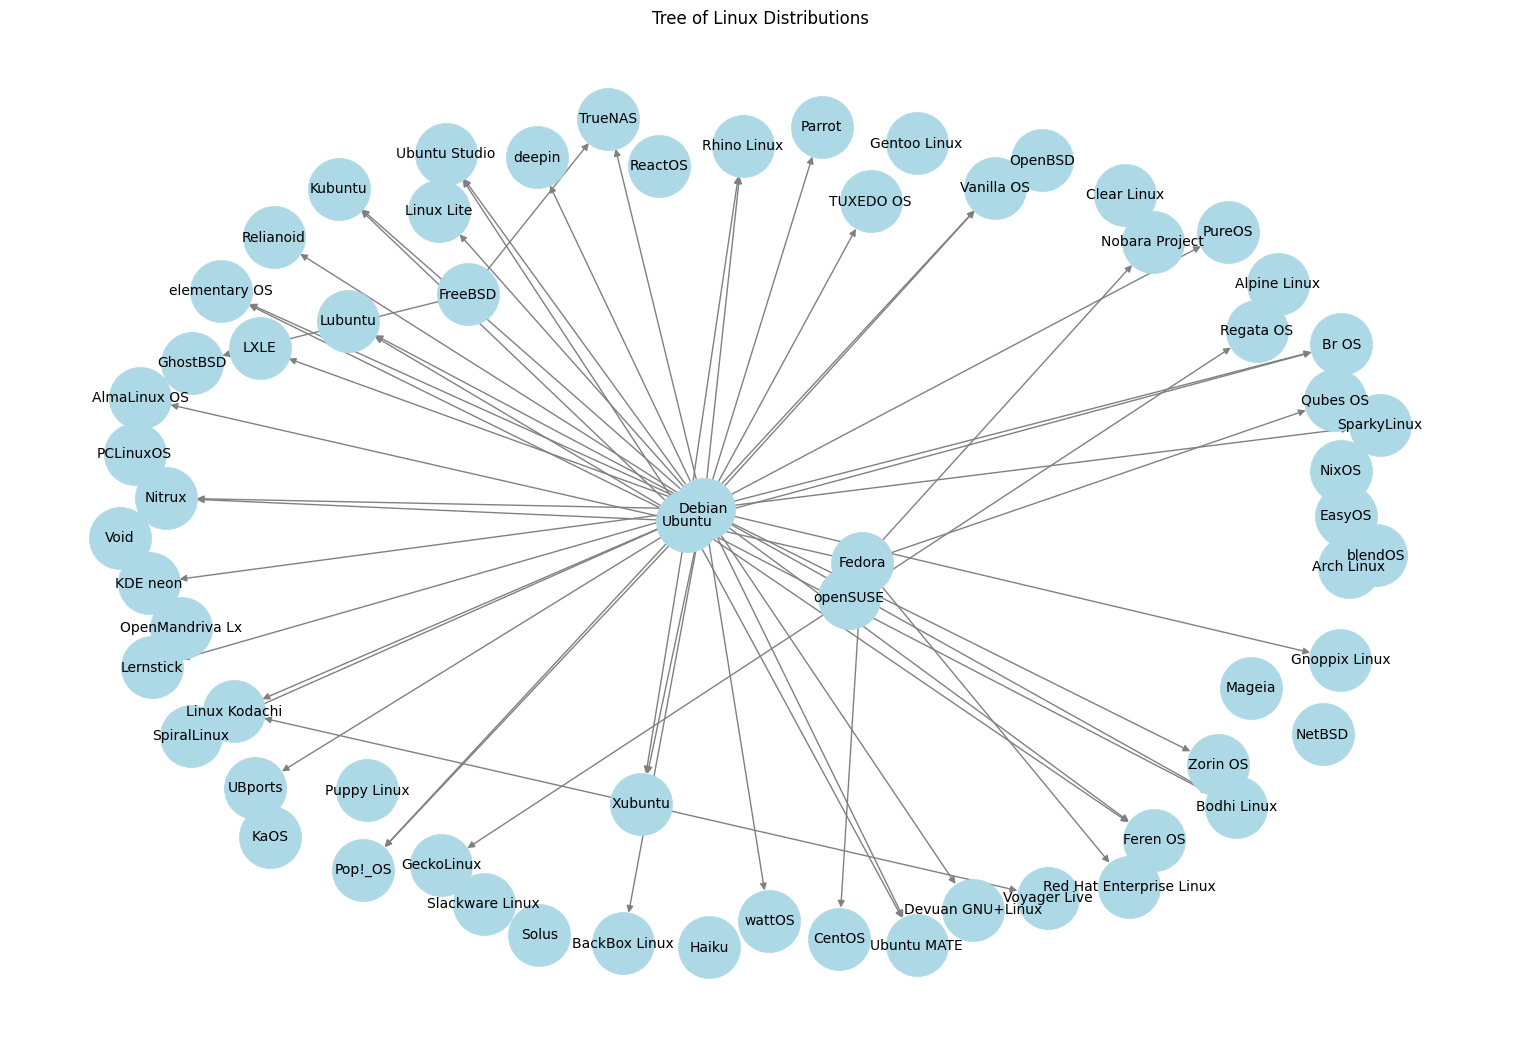

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to recursively add nodes and edges to the graph
def add_nodes(graph, parent, children):
    for child in children:
        graph.add_node(child)
        if parent is not None:
            graph.add_edge(parent, child)
        add_nodes(graph, child, tree[child])

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the tree
add_nodes(G, None, tree[None])

# Set up plot size
plt.figure(figsize=(15, 10))

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # for consistent layout
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, edge_color="gray", linewidths=0.5, font_size=10)

# Show the plot
plt.title("Tree of Linux Distributions")
plt.show()


In [7]:
from collections import defaultdict
import ast

# Function to safely parse strings into lists
def safe_parse_list(s):
    try:
        return ast.literal_eval(s)
    except:
        return []

# Parse the 'Bases' column
data['Bases'] = data['Bases'].apply(safe_parse_list)

# Create a dictionary to hold the tree structure
tree = defaultdict(list)

# Populate the tree with parent-child relationships
for index, row in data.iterrows():
    child = row['Name']
    bases = row['Bases']
    if not bases:  # If no base, it's a root
        tree[None].append(child)
    else:
        for base in bases:
            tree[base].append(child)

# Display the first few elements of the tree for verification
list(tree.items())[:5]

[('Debian (Stable)',
  ['MX Linux',
   'Linux Mint',
   'antiX',
   'Q4OS',
   'Peppermint OS',
   'Tails',
   'Voyager Live',
   'Slax',
   'Neptune',
   'Emmabuntüs']),
 ('antiX', ['MX Linux']),
 ('Ubuntu (LTS)',
  ['Linux Mint',
   'BackBox Linux',
   'Zorin OS',
   'KDE neon',
   'Linux Lite',
   'MakuluLinux',
   'TUXEDO OS',
   'Linuxfx',
   'LXLE']),
 ('Arch',
  ['EndeavourOS',
   'Manjaro Linux',
   'Garuda Linux',
   'Mabox Linux',
   'ArcoLinux',
   'CachyOS',
   'Artix Linux',
   'Athena OS',
   'XeroLinux',
   'Archcraft',
   'RebornOS',
   'Bluestar Linux']),
 (None,
  ['Debian',
   'Fedora',
   'openSUSE',
   'FreeBSD',
   'NixOS',
   'EasyOS',
   'Mageia',
   'KaOS',
   'PCLinuxOS',
   'Puppy Linux',
   'NetBSD',
   'ReactOS',
   'Solus',
   'Slackware Linux',
   'Alpine Linux',
   'Gentoo Linux',
   'Arch Linux',
   'OpenBSD',
   'Haiku',
   'OpenMandriva Lx',
   'Clear Linux',
   'Void'])]

In [21]:
%pip install jupyter_contrib_nbextensions widgetsnbextension
!jupyter nbextension enable --py --sys-prefix widgetsnbextension


Note: you may need to restart the kernel to use updated packages.
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
qtconsole run server troubleshoot trust

Jupyter command `jupyter-nbextensi

In [21]:
import plotly.graph_objects as go
import networkx as nx

# Create a networkx graph from the tree
G = nx.DiGraph()
add_nodes(G, None, tree[None])

# Get positions for the nodes in G
pos = nx.spring_layout(G, seed=42)

# Create Edges
edge_x = []
edge_y = []
annotations = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

    # Create an annotation with an arrow
    annotations.append(dict(
        ax=x0, ay=y0, axref='x', ayref='y',
        x=x1, y=y1, xref='x', yref='y',
        showarrow=True,
        arrowhead=3, arrowsize=2, arrowwidth=1, arrowcolor='black'))

# Create Nodes
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# Create figure
fig = go.Figure()

# Add edges as scatter trace
fig.add_trace(go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='green'),
    hoverinfo='none',
    mode='lines'))

# Add nodes as scatter trace
fig.add_trace(go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=[node for node in G.nodes()],  # Node names as hover text
    hovertext=[node for node in G.nodes()],  # Node names as hover text
    marker=dict(
        showscale=False,
        color=[len(list(G.neighbors(node))) for node in G.nodes()],
        size=20,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)))

# Update plot layout with annotations
fig.update_layout(
    title='Interactive Network of Linux Distributions',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    annotations=annotations,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

fig.show()


In [22]:
import ast

# Re-process the 'Origins' column
data['Origins'] = data['Origins'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten the list of origins and count the number of distributions per origin
origin_counts = pd.Series([origin for sublist in data['Origins'].dropna() for origin in sublist]).value_counts()

origin_counts.head()


USA        28
Germany     9
France      6
Global      5
Poland      4
Name: count, dtype: int64

In [23]:
import geopandas as gpd

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Mapping each country name to its central coordinates
country_coords = world.set_index('name')['geometry'].centroid
country_coords = country_coords.to_crs(epsg=4326)  # Convert to latitude/longitude

# Create a dataframe for the geospatial data
geo_data = pd.DataFrame([{'Country': country, 'Count': origin_counts[country], 
                          'Latitude': country_coords.loc[country].y, 
                          'Longitude': country_coords.loc[country].x} 
                         for country in origin_counts.index if country in country_coords.index])

geo_data.head()



/tmp/ipykernel_7109/3777996231.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

/tmp/ipykernel_7109/3777996231.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,Country,Count,Latitude,Longitude
0,Germany,9,51.133723,10.288485
1,France,6,42.460704,-2.876697
2,Poland,4,52.148260,19.311014
3,Ireland,4,53.180591,-8.010237
4,Brazil,4,-10.806774,-53.054340


In [24]:
import plotly.express as px

# Assuming 'geo_data' is a DataFrame with columns 'Country', 'Count', 'Latitude', 'Longitude'
fig = px.scatter_geo(geo_data,
                     lat='Latitude',
                     lon='Longitude',
                     size='Count',  # Adjusts the size of the point based on the count
                     hover_name='Country',  # Shows the country name on hover
                     projection='natural earth',
                     title='Geospatial Distribution of Linux Distributions')

fig.show()

In [145]:
to_scrape_list = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
for s in to_scrape_list:
    url = f'https://distrowatch.com/index.php?dataspan={s}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    distros = soup.find_all('td', {'class': 'News'})
    distros = distros[102:-14]
    distributions = []
    ids = []
    page_hits = []
    for idx, distro in enumerate(distros):
        if idx % 2 == 0:
            distributions.append(distro.get_text())
            ids.append(distro.a['href'])
        else:
            page_hits.append(distro.get_text())
    
    top_distros = {
        'distribution': distributions,
        'id': ids,
        'page hit(s)': page_hits 
    }
    df = pd.DataFrame(top_distros)
    df.to_json(f"top_distros_{s}.json", orient="records")

In [40]:
to_scrape_list = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 52, 26, 13, 4, 1]
for s in to_scrape_list:
    url = f'https://distrowatch.com/index.php?dataspan={s}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    distros = soup.find_all('td', {'class': 'phr2'})
    hits = soup.find_all('td', {'class': 'phr3'})
    distributions = []
    ids = []
    page_hits = []
    for distro in distros:
        distributions.append(distro.get_text())
        ids.append(distro.a['href'])

    for hit in hits:
        page_hits.append(int(hit.get_text()))
    
    top_distros = {
        'distribution': distributions,
        'id': ids,
        'page hit(s)': page_hits 
    }
    df = pd.DataFrame(top_distros)
    df.to_json(f"top_distros_{s}.json", orient="records")

In [146]:
import json

# Load the data from the provided files
file_paths = {
    "1 Week Ago": 'top_distros_1_week_ago.json',
    "1 Month Ago": 'top_distros_1_month_ago.json',
    "3 Months Ago": 'top_distros_3_months_ago.json',
    "6 Months Ago": 'top_distros_6_months_ago.json',
    "12 Months Ago": 'top_distros_12_months_ago.json',
    "2022": 'top_distros_2022.json',
    "2021": 'top_distros_2021.json',
    "2020": 'top_distros_2020.json',
    "2019": 'top_distros_2019.json',
    "2018": 'top_distros_2018.json',
    "2017": 'top_distros_2017.json',
    "2016": 'top_distros_2016.json',
    "2015": 'top_distros_2015.json',
    "2014": 'top_distros_2014.json',
    "2013": 'top_distros_2013.json',
    "2012": 'top_distros_2012.json',
    "2011": 'top_distros_2011.json',
    "2010": 'top_distros_2010.json',
    "2009": 'top_distros_2009.json',
    "2008": 'top_distros_2008.json',
    "2007": 'top_distros_2007.json',
    "2006": 'top_distros_2006.json',
    "2005": 'top_distros_2005.json',
    "2004": 'top_distros_2004.json',
    "2003": 'top_distros_2003.json',
    "2002": 'top_distros_2002.json',
}

# Read and parse the JSON data from each file
data = {}
for time_period, path in file_paths.items():
    with open(path, 'r') as file:
        data[time_period] = json.load(file)

# Display the structure of the loaded data to understand its format
data["1 Month Ago"]



[{'distribution': 'MX Linux', 'id': 'mx', 'page hit(s)': 2702},
 {'distribution': 'Mint', 'id': 'mint', 'page hit(s)': 1999},
 {'distribution': 'EndeavourOS', 'id': 'endeavour', 'page hit(s)': 1625},
 {'distribution': 'Debian', 'id': 'debian', 'page hit(s)': 1393},
 {'distribution': 'Fedora', 'id': 'fedora', 'page hit(s)': 1257},
 {'distribution': 'Manjaro', 'id': 'manjaro', 'page hit(s)': 1085},
 {'distribution': 'Ubuntu', 'id': 'ubuntu', 'page hit(s)': 1071},
 {'distribution': 'Pop!_OS', 'id': 'popos', 'page hit(s)': 884},
 {'distribution': 'Garuda', 'id': 'garuda', 'page hit(s)': 873},
 {'distribution': 'openSUSE', 'id': 'opensuse', 'page hit(s)': 738},
 {'distribution': 'Zorin', 'id': 'zorin', 'page hit(s)': 718},
 {'distribution': 'AlmaLinux', 'id': 'alma', 'page hit(s)': 605},
 {'distribution': 'FreeBSD', 'id': 'freebsd', 'page hit(s)': 567},
 {'distribution': 'KDE neon', 'id': 'kdeneon', 'page hit(s)': 565},
 {'distribution': 'Nobara', 'id': 'nobara', 'page hit(s)': 528},
 {'dis

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the data to a more usable format
# Creating a DataFrame for each time period
df_list = []
for time_period, distros in data.items():
    df = pd.DataFrame(distros)
    df.set_index('distribution', inplace=True)
    df.drop(columns=['id'], inplace=True)
    df.rename(columns={'page hit(s)': time_period}, inplace=True)
    df_list.append(df)

# Merging the dataframes into a single one for analysis
merged_df = pd.concat(df_list, axis=1, sort=False)




In [152]:
# Selecting top distributions for clarity in the plot
# We take top 10 distributions from "1 Month Ago" data
top_distributions = merged_df['1 Month Ago'].sort_values(ascending=False).head(15).index

# Filtering data for only top distributions
filtered_df = merged_df.loc[top_distributions]

# Reversing the columns to have the oldest data first
filtered_df = filtered_df.iloc[:, ::-1]

""" # Plotting the data
plt.figure(figsize=(15, 8))
for distribution in filtered_df.index:
    plt.plot(filtered_df.columns, filtered_df.loc[distribution, :], marker='o', label=distribution)

plt.title('Popularity Timeline of Top Linux Distributions')
plt.xlabel('Time Period')
plt.ylabel('Page Hits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
 """

" # Plotting the data\nplt.figure(figsize=(15, 8))\nfor distribution in filtered_df.index:\n    plt.plot(filtered_df.columns, filtered_df.loc[distribution, :], marker='o', label=distribution)\n\nplt.title('Popularity Timeline of Top Linux Distributions')\nplt.xlabel('Time Period')\nplt.ylabel('Page Hits')\nplt.xticks(rotation=45)\nplt.legend()\nplt.grid(True)\nplt.show()\n "

In [153]:
import plotly.express as px

# Assuming 'filtered_df_revised' is the DataFrame you have prepared
# Transpose the DataFrame for easier plotting with Plotly
plotly_df = filtered_df.transpose()

# Creating a Plotly line chart
fig = px.line(plotly_df, x=plotly_df.index, y=plotly_df.columns,
              labels={'value': 'Page Hits', 'variable': 'Distribution'},
              title='Popularity Timeline of Top 15 Current Linux Distributions from 2002 - 1 week ago')

# Adding hover data
fig.update_traces(mode='lines+markers', hoverinfo='all')

# Updating layout for better readability
fig.update_layout(xaxis_title='Time Period',
                  yaxis_title='Page Hits',
                  legend_title='Distribution',
                  xaxis_tickangle=-45)

fig.show()